Teoria de la Informacion

La teoria de la informacion es un campo de estudio que se ocupa de cuantificar, almacenar y comunicar informacion de manera eficiente.

La entropia, entropia conjunta y la entropia condicional son conceptos fundamentales en al teoria de la informacion que se utilizan para medir la cantidad de incertidumbre o informacion en sistemas de comunicacion y de procesamiento de datos.

Entropia (H)

- La entropia, denotada como H(X), es una medida de la incertidumbre o la imprevisibilidad de una variable aleatoria X. Escencialmente, indica cuanta informacion, en promedio, se revela al observar una instancai de esa variable. La entropia se calcula utilizando la siguiente formula:

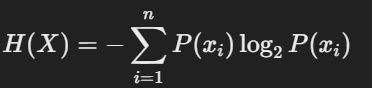

Donde P(xi) es la probablidad de cada posible valor xi que puede tomar X, y n es el numero de todos los posibles valores de X. La unidad tipica de la entropia es el bit si el logaritmo se toma en base 2.

Entropia Conjunta (H)

- La entropia conjunta de dos variables aleatorias X y Y, denotada como H(X, Y), mide la cantidad total de incertidumbre en el par de variables (X, Y). La formula para calcular la entropia conjunta es:

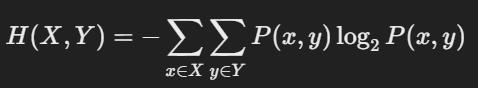

Donde P(x, y) es la probablidad conjunta de X e Y tomando los valores x e y respectivamente.

Entropia Condicional (H)

- La entropia condicional de X dado Y, denotada como H(X | Y), es una medida de la cantidad de incertidumbre que queda en X cuando Y es conocida. Se calcula con la siguiente formula:

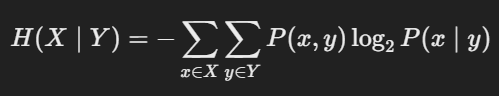

O alternativamente:

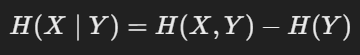

Esto indica que la entropia condicional es la entropia conjunta de X y Y menos la entropia de Y solo.

Estos conceptos son cruciales para entender como se puede codificar y transmitir informacion de manera eficiente. Por ejemplo, reducir la entropia condicional es escencial en la compresion de datos y en la codificacion de canal, donde se busca minimizar la redundancia y los errores en la transmicion de informacion. La entropia condicional tambien juega un paple importante en la teoria de la decision y en el aprednizaje de maquina, donde se busca reducir la incertidumbre sobre una variable objeitvo conociendo otras variables relacionadas.

Ejemplo:

Supongamos que tenemos una moneda equilibrada con dos posibles resultados: cara o cruz. Cada resultado tiene una probabilidad de 0.5. La entropia, en este caso seria:


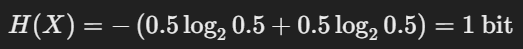

Esto significa que se necesita al menos 1 bit para codificar el resutlado de un lanzamiento de una moneda equilibrada.

En contrase, si tenes una moneda trucada donde la probabilidad de cara es 0.9 y la de cruz es 0.1, la entropia sera:

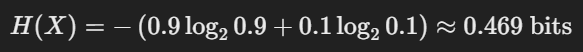

La entopia menor que 1 bit refleja que la moneda es mas predecible comparada con una moneda equilibrada.

Apliaciones de la Entropia

1- Compresion de datos: La entropia ayuda a determinar el limite teorico para la comprension de datos mas eficinetes sin perdida de informacion.

2- Criptografia: Proporciona una medida de la cantidad de incertidumbre que se puede introducir en los sistemas de cifrado, crucial para asegurar la robustez de los algoritmos criptograficos.

3- Teoeria de decision y Aprendizaje Automatico: En la teoria de decision y el aprendizaje automatico, la entropia se utiliza para construir modelos e decision, como los arboles de decision, donde se eligen atributos que maximizan la reduccion de la entropia.







Aca quiero encontrar el intervalo [a, b] donde la uniforme tiene la misma entropia que la normal estandar

Entropia empirica de la N(0,1):  1.4191284059986737
Entropia empirica de la uniforme entre -2.07 y 2.07:  1.4190836049977251


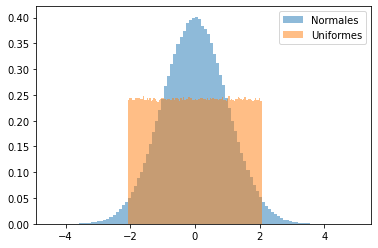

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def H(X, n_bins):
    """H(x) = - sum_x p(x)log_2(p(x))"""
    hist, bin_edges = np.histogram(X, bins=n_bins, density=True)
    ancho_bin = bin_edges[1] - bin_edges[0]
    # print("ancho del bin", ancho_bin)
    # print("px", np.mean(hist/np.sum(hist)))
    # print("muestras por bin", np.mean(hist))
    x = (hist/np.sum(hist)) 
    hx = 0
    for px in x:
        if px != 0:
            hx += px*np.log(px/ancho_bin)
            
    # print("log2(px)", np.log2(px))
    # print("px*log2(px)", px*np.log2(px))
    return np.abs(hx)


N = 1000000
bins = 100

muestrasNormales = np.random.normal(0,1,N)
#calculo la entropia de ambas muestras
H_normal = H(muestrasNormales, bins) # 0.5 * ln(2*pi*sigma^2) + 0.5 

# despejo de 'a' la formula de la ecuación -ln(1/(2a)) = H_normal
a = np.exp(H_normal) / 2
muestrasUniformes = np.random.uniform(-a,a,N)
H_uniforme = H(muestrasUniformes, bins) # - \int_{-10}^{10} p(x)ln(p(x)) dx = - 1/20 * ln(1/20) * 20 = -ln(1/20) = -ln(1/(b-a)) 

print("Entropia empirica de la N(0,1): ", H_normal)
print(f"Entropia empirica de la uniforme entre -{round(a,2)} y {round(a,2)}: ", H_uniforme)


plt.hist(muestrasNormales, bins=bins, alpha=0.5, label='Normales', density=True)
plt.hist(muestrasUniformes, bins=bins, alpha=0.5, label='Uniformes', density=True)
plt.legend()
plt.show()


In [3]:
def joint_entropy(prob_matrix):
    prob_matrix = prob_matrix[prob_matrix > 0]
    return -np.sum(prob_matrix * np.log2(prob_matrix))

# Probabilidades conjuntas para variables aleatorias X e Y
prob_XY = np.array([
    [0.1, 0.1, 0.0],
    [0.2, 0.1, 0.1],
    [0.0, 0.2, 0.2]
])
print("Entropía conjunta de X y Y:", joint_entropy(prob_XY))


Entropía conjunta de X y Y: 2.7219280948873625


In [15]:
def conditional_entropy(prob_XY):
    """ Calcula la entropía condicional H(X|Y) a partir de una matriz de probabilidades conjuntas. """
    # Suma sobre las filas para obtener la distribución marginal de Y
    prob_Y = np.sum(prob_XY, axis=0)
    # Evitar dividir por cero
    prob_Y = np.where(prob_Y == 0, 1, prob_Y)
    # Calcular P(X|Y)
    conditional_prob = prob_XY / prob_Y
    conditional_prob = conditional_prob[prob_XY > 0]
    return -np.sum(prob_XY[prob_XY > 0] * np.log2(conditional_prob))

print("Entropía condicional H(X|Y):", conditional_entropy(prob_XY))


Entropía condicional H(X|Y): 1.1509775004326939


Informacion Mutua (MI)

Es una medida fundamental en la teoria de la informacion que cuantifica la cantidad de informacion compartida entre dos variables aleatorias. Se usa para determinar cuanto reduce la incertidumbre acerca de una variable al conocer la otra.

Formulas de Informacion Mutua

1- Basada en entropia:

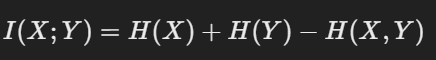

Donde H(X) y H(Y) son las entropias de X y Y, respectivamente, y H(X, Y) es la entropia conjunta de X y Y.

2- Basada en entropia condicional:

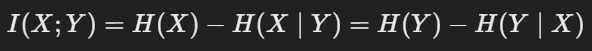

Esto refleja que la informacion mutua tambien es la reduccion en la entropia de X debido al conocimiento de Y, y viceversa.

3- Basda en probabilidades conjuntas y marginales:

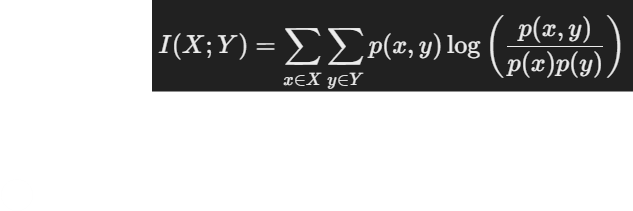

Donde p(x, y) es la probabilidad conjunta de X y Y, y p(x) y p(y) son las probabilidades marginales.

Ejemplo en Python:

Implementar el calculo de la informacion mutua en python, dada una matriz de probabilidades conjuntas y sus correspondientes marginales, se puede realizar con la siguiente funcion. Aqui se incluye tambien una forma de calcular las probabildiades marginales a partir de la matriz conjunta:

In [1]:
import numpy as np

def mutual_information(prob_XY):
    """ Calcula la información mutua de una matriz de probabilidades conjuntas P(X, Y). """
    # Obtener probabilidades marginales
    prob_X = np.sum(prob_XY, axis=1)
    prob_Y = np.sum(prob_XY, axis=0)
    
    # Entropías individuales
    H_X = entropy(prob_X)
    H_Y = entropy(prob_Y)
    
    # Entropía conjunta
    H_XY = joint_entropy(prob_XY)
    
    # Información mutua
    MI = H_X + H_Y - H_XY
    return MI

# Matriz de probabilidad conjunta ejemplo
prob_XY = np.array([
    [0.1, 0.1, 0.0],
    [0.2, 0.1, 0.1],
    [0.0, 0.2, 0.2]
])

print("Información Mutua entre X e Y:", mutual_information(prob_XY))


NameError: name 'entropy' is not defined

Divergencia de Kullback-Leibler (KL) es una medida en teoria de la informacion que cuantifica cuan diferente es una distribucion de probabilidad P de otra distribucion de referencia Q. Frecuentenemente se refiere a la divergencia de KL como una "distancia" entre distribuciones, aunque tecnicamente no es una distancia en el sentido matematico porque no es siemtrica ni satisface la desigualdad triangular. Esta medida es fundamental para metodos que involucran la estimacion de la similitud entre distribuciones y se utiliza ampliamente en campos como el aprendizaje automatico, la estadisitca y la investigacion de seniales.

Definicion Matematica

La divergencia de Kullback-Leibler de P respecto a Q para distribuciones discretas se define como:

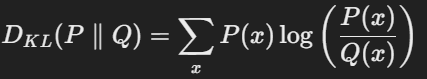

donde P(x) y Q(x) son las probabilidades de x bajo las distribuciones P y Q, respectivamente. La suma se realiza sobre todos los posibles valores de x en el espacio de eventos. Es importante notar que DKL(P || Q) != DKL(Q || P).

Para distribuciones continuas, la divergencia de KL se expresa como una integral:

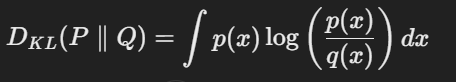

donde p(x) y q(x) son las funciones de densidad de probabildiad de P y Q.

Propiedades de la divergencia de KL

1- No negatividad: DKL(P || Q) >= 0, y DKL(P || Q) = 0 si y solo si P = Q en todas partes donde P es positiva.
2- Asimetria: DKL(P || Q) no es igual a DKL(Q || P). Esto significa que la informacion perdida al aproximar P coon Q no es la misma que al hacer lo contrario.

Ejemplo de implementacion en Python

Para calcualr la divergencia de Kullback-Leibler en Python entre dos distribuciones discretas, podemos usar la siguiente funcion:

In [17]:
import numpy as np

def kl_divergence(P, Q):
    """ Calcula la divergencia de Kullback-Leibler D_KL(P || Q) entre dos distribuciones. """
    # Asegurar que no haya divisiones por cero
    P = np.array(P)
    Q = np.array(Q)
    P = P[P > 0]  # Solo considerar los valores donde P es positivo
    Q = Q[Q > 0]  # Solo considerar los valores donde Q es positivo

    # Calcular la divergencia de KL
    return np.sum(P * np.log(P / Q))

# Ejemplo de distribuciones
P = [0.25, 0.25, 0.25, 0.25]
Q = [0.1, 0.1, 0.4, 0.4]

print("Divergencia de KL entre P y Q:", kl_divergence(P, Q))


Divergencia de KL entre P y Q: 0.22314355131420974


Interpretacion de resultado

1- Valor de DKL

- DKL = 0 indica que las dos distribuciones P y Q son identicas en todos los puntos donde P es positiva. En otras palabras, no hay perdida de informacion al usar Q para representar P.

- DKL > 0 sugiere que Q no representa perfectamente a P. Cuanto mayor es el valor, mayor es la discrepancia entre P y Q, y mas informacion se pierde al usar Q para aproximar P.

2- Asimetria:

- La divergencia de KL no es simetrica. Esto significa que DKL(P || Q) no es necesariamente igual a DKL(Q || P). Por ejemplo, si se utiliza Q para aproximar P, la cantidad de informacion perdida puede ser diference que si se utiliza P para aproximar Q. Esto es importante porque revela que el costo de la aproximacion puede depender de la direccion en que se haga la aproximacion.

3- Significado Practico:

- En aprendizaje automatico, por ejemplo, la divergencia KL se utiliza para medir cuan bien un modelo (que produce Q) se ajusta a los datos reales (representados por P). Un valor bajo de DKL indica un buen ajuste del modelo.

- En teoria de la informacion, ayuda a entender cuanta informacion adicional es necesaria para codificar muestras de P usando un esquema optimo diseniado para Q.

